In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,56.727688,5.812540,8.870897,-0.591261,17.244178
1,50.571562,12.040431,5.757897,3.107176,15.750623
2,59.150147,3.605026,9.287672,8.104701,17.927369
3,55.726868,11.341047,9.181730,19.626833,21.964225
4,47.144655,5.346275,6.778025,-4.805018,17.194184


<AxesSubplot: ylabel='Density'>

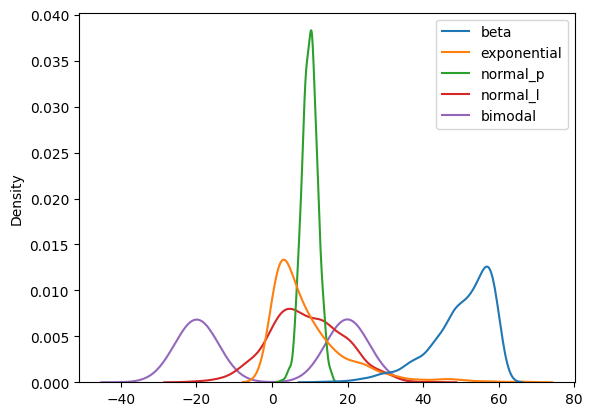

In [5]:
# Trực quan hóa dữ liệu sinh ra
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.239279,9.746244,9.988065,9.141165,0.005873
std,8.144247,10.239895,2.057063,9.607115,20.192471
min,13.177992,0.004246,2.407811,-21.268725,-29.968959
25%,46.109083,2.499627,8.646357,2.532625,-19.893067
50%,52.223903,6.421375,10.045253,8.718924,-0.710125
75%,56.814535,13.357970,11.353721,15.742327,19.863192
max,59.997751,66.460557,15.875572,41.549341,27.959835


<AxesSubplot: ylabel='Density'>

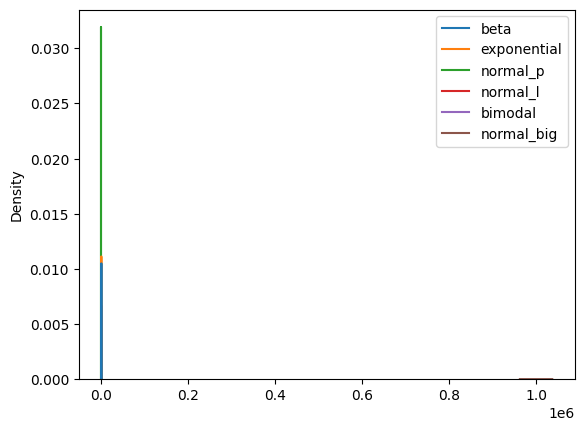

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot: >

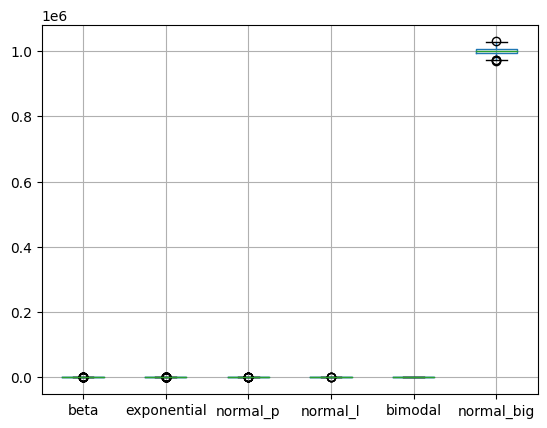

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [9]:
# Khai báo đối tượng MinMaxScaler
scaler = RobustScaler()
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [10]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.420700,-0.056071,-0.433764,-0.704799,0.451609,-0.665534
1,-0.154346,0.517487,-1.583591,-0.424820,0.414042,0.821913
2,0.646983,-0.259372,-0.279822,-0.046498,0.468794,-0.877877
3,0.327213,0.453078,-0.318953,0.825750,0.570334,-0.099977
4,-0.474454,-0.099011,-1.206793,-1.023789,0.450352,0.188042


<AxesSubplot: ylabel='Density'>

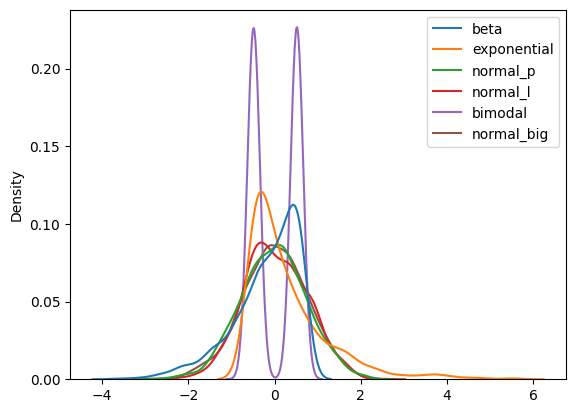

In [11]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [13]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,-0.185384,0.306204,-0.021123,0.031964,0.018010,1.353122e-02
std,0.760757,0.943044,0.759803,0.727277,0.507907,7.464977e-01
min,-3.647292,-0.590986,-2.820989,-2.270123,-0.735955,-2.144827e+00
25%,-0.571187,-0.361174,-0.516700,-0.468315,-0.482514,-4.926048e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,-4.229690e-15
75%,0.428813,0.638826,0.483300,0.531685,0.517486,5.073952e-01
max,0.726158,5.529313,2.153504,2.485326,0.721143,2.139936e+00


<AxesSubplot: >

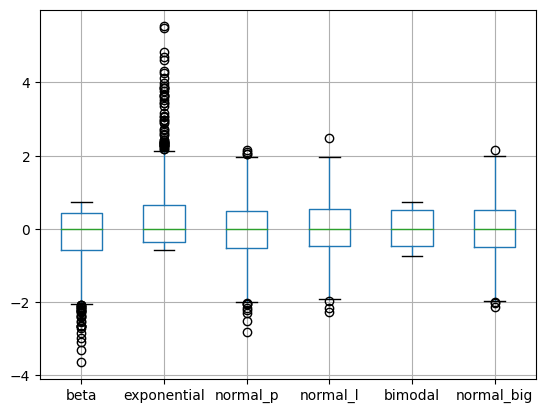

In [14]:
df_s.boxplot()